# **Q2.GMM Clustering** 

In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **GMM**

In real life, many datasets can be modeled by Gaussian Distribution (Univariate or Multivariate). So it is quite natural and intuitive to assume that the clusters come from different Gaussian Distributions. Or in other words, it is tried to model the dataset as a mixture of several Gaussian Distributions.

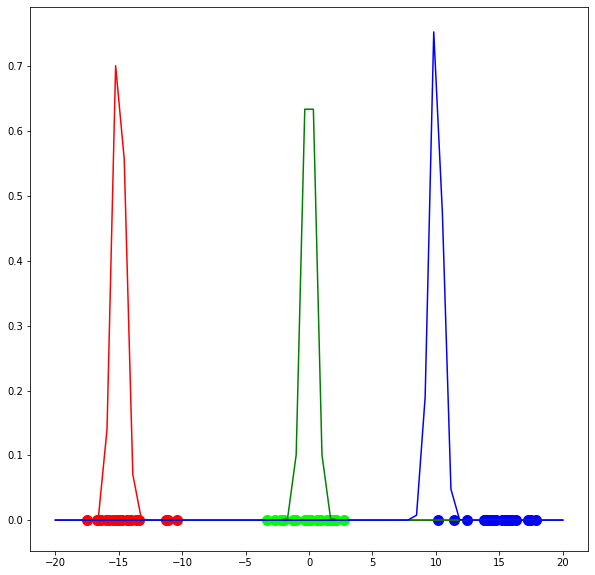

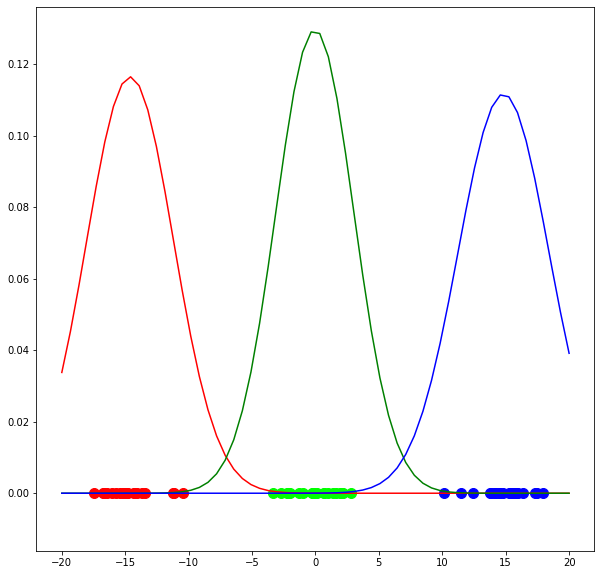

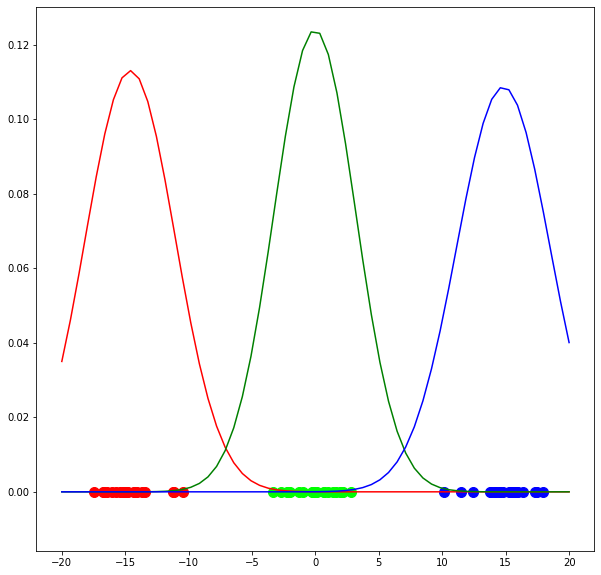

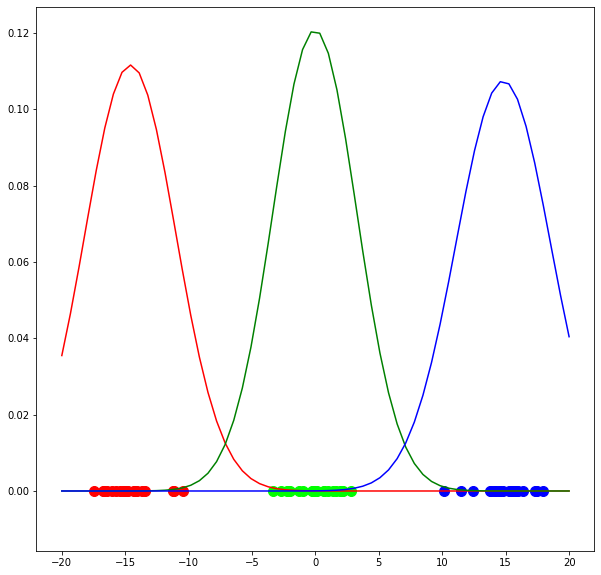

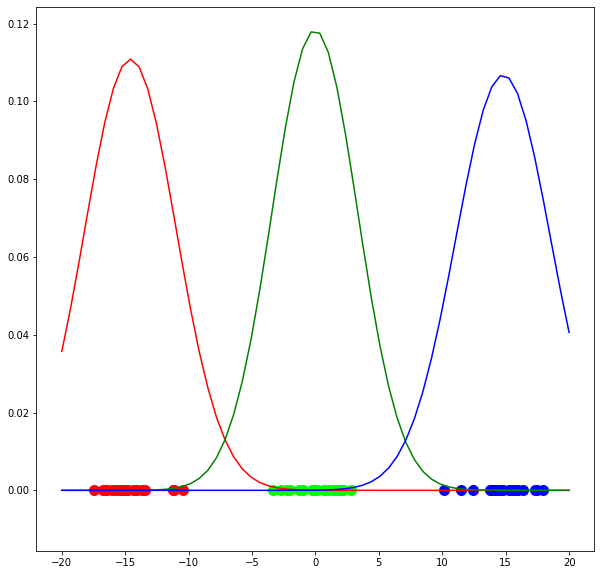

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle
np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
    #"""initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X.flatten())
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
          r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
        	# Write code here
            
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=[[r[i][0],r[i][1],r[i][2]]],s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g.flatten(),c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            r = np.zeros((len(self.X),3))  

            r = self.calculate_prob(r)

            self.plot(r)
            
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m)

            pi_c = []
            length=len(m_c)
            sum=np.sum(m_c)
            for i in range(length):
              temp=m_c[i]/sum
              pi_c.append(temp)
            self.pi = pi_c;            
            
            temp1=self.X.reshape(len(self.X),1)*r

            mu_c = np.sum(temp1*r,axis=0)/m_c
             
            self.mu =mu_c 

            var_c = []
            for c in range(len(r[0])):
              var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-mu_c[c])).T,(self.X.reshape(len(self.X),1)-mu_c[c])))
            self.var = var_c;

            temp_var = []
            length=len(r[0])
            for c in range(length):
              array1=np.array(r[:,c])
              array1=array1.reshape(60,1)

              array2=self.X.reshape(len(self.X),1)
              array2=array2-mu_c[c]

              prod=(array1*array2).T
              var_c.append((1/m_c[c])*np.dot(prod,array2))
            self.var = var_c;           


            plt.show()

"""
To run the code - 
g = GMM1D(data,10,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()
"""

path1="/content/drive/My Drive/Datasets/Question-2/dataset1.pkl"
path2="/content/drive/My Drive/Datasets/Question-2/dataset2.pkl"
path3="/content/drive/My Drive/Datasets/Question-2/dataset3.pkl"
var1=load(path1)
var2=load(path2)
var3=load(path3)

g = GMM1D(var1,5,[-15,0,10],[1/3,1/3,1/3],[0.5,0.5,0.5])
g.run()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


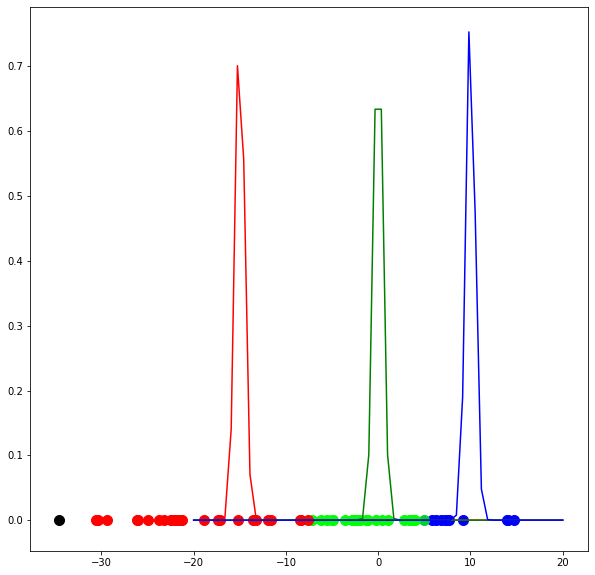

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


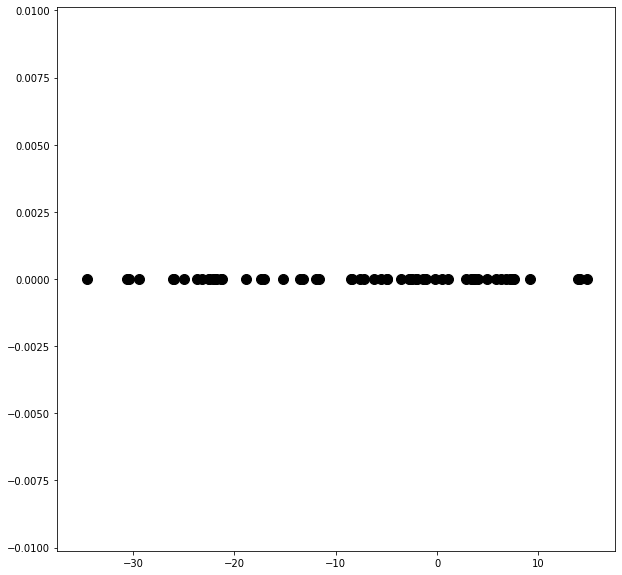

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


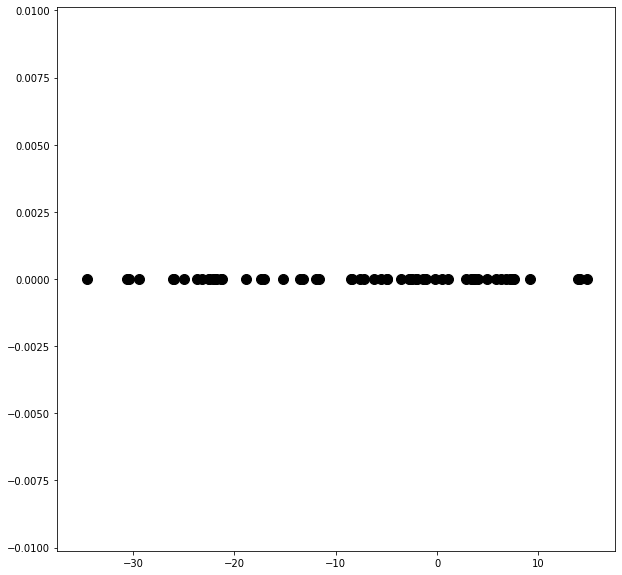

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


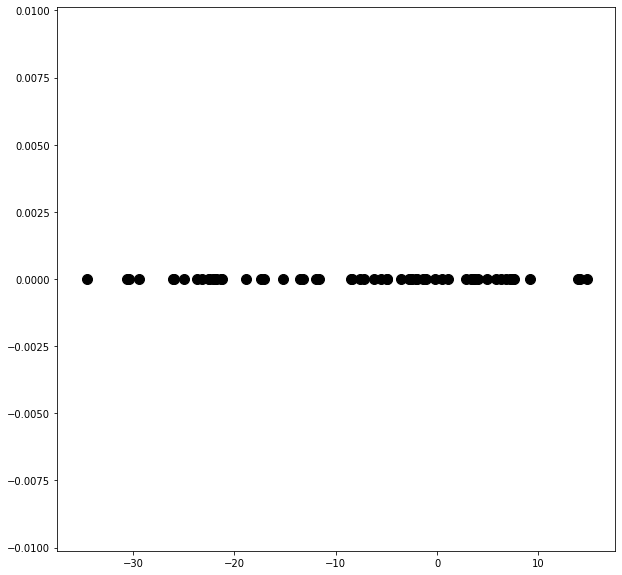

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


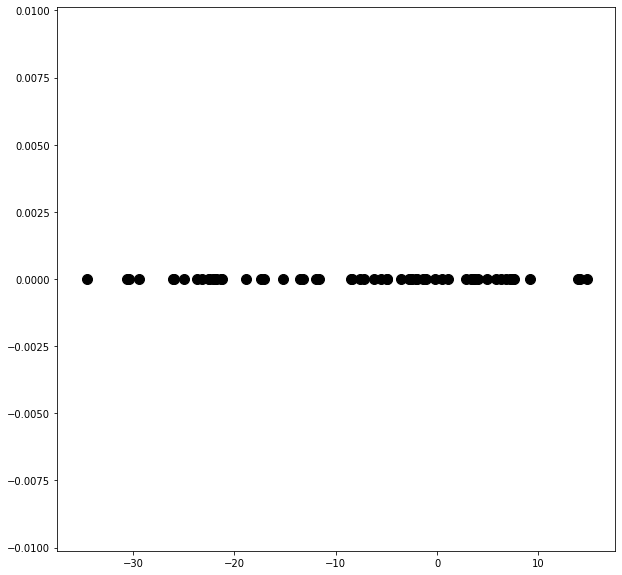

In [0]:
g = GMM1D(var2,5,[-15,0,10],[1/3,1/3,1/3],[0.5,0.5,0.5])
g.run()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


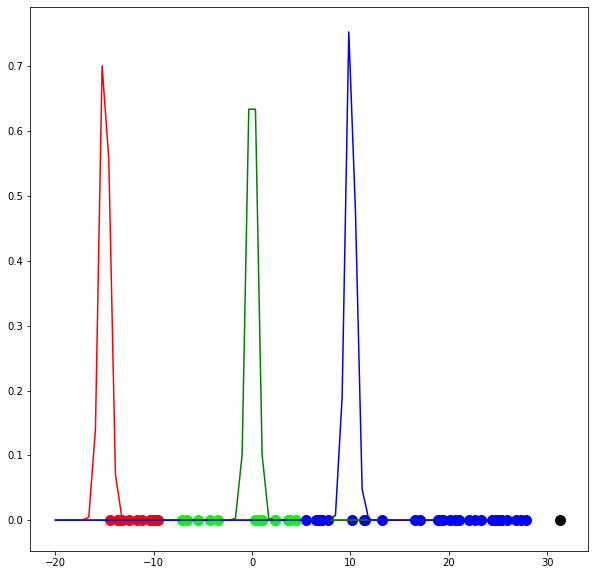

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


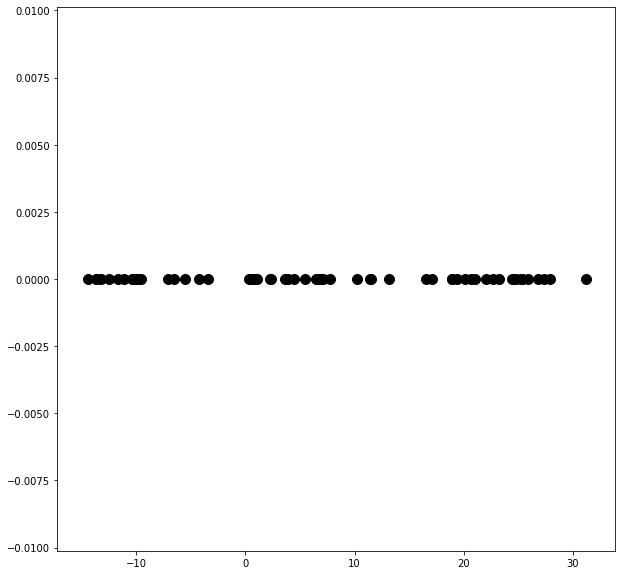

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


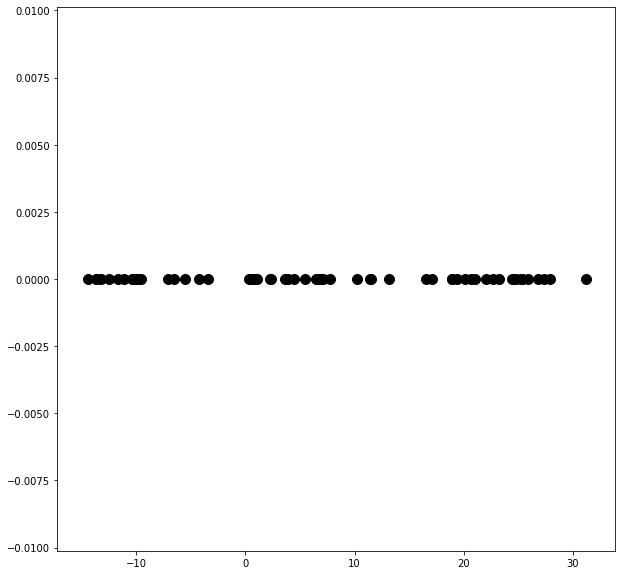

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


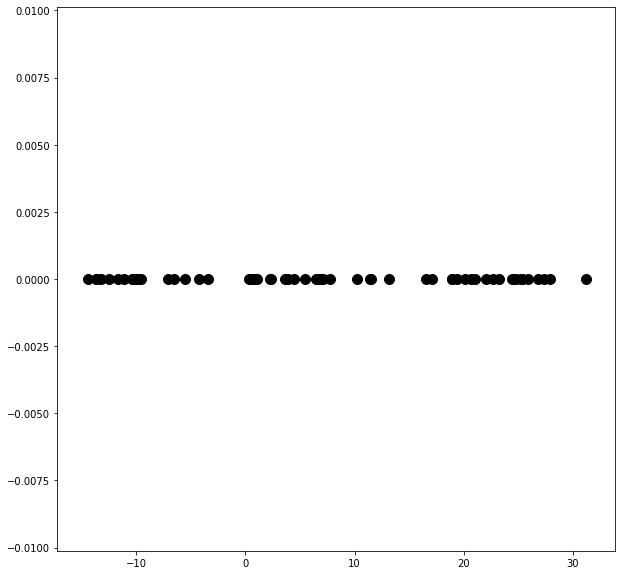

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


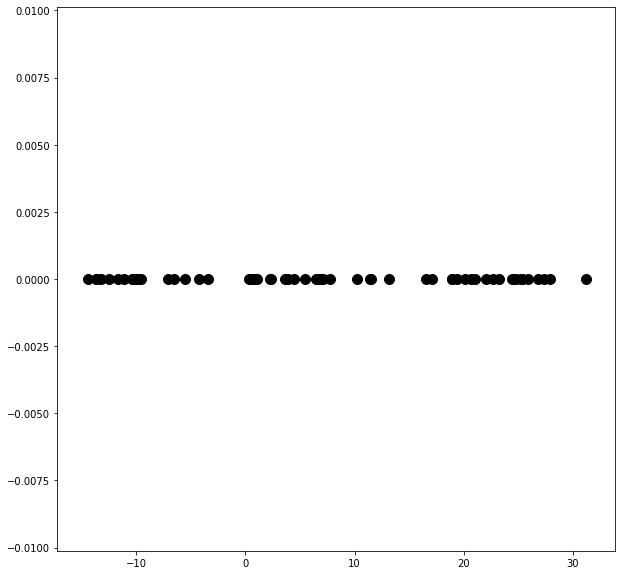

In [0]:
g = GMM1D(var3,5,[-15,0,10],[1/3,1/3,1/3],[0.5,0.5,0.5])
g.run()

In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(var)